In [1]:
# install machine gnostics
# recommended to run in a new virtual environment

# !pip install machinegnostics #<-- Uncomment this line to install the package

### User Note: Understanding Gnostic Interval Analysis

**End-to-End Marginal Interval Analysis**

The IntervalAnalysis class provides a robust, automated workflow for estimating meaningful data intervals (such as tolerance and typical intervals) using Gnostic Distribution Functions (GDFs) like ELDF and EGDF. It is designed for reliability, diagnostics, and adaptive interval estimation in scientific and engineering data analysis.

#### Gnostic Theory Foundation

In Gnostics, interval analysis is a study of **sensitivity** and **robustness**. It answers the question: "How does the sample's center change if we add a new, arbitrary value?"

1.  **The Thought Experiment:** The algorithm calculates the **Estimating Local Distribution Function (ELDF)** for the sample. It then mathematically extends the sample by one "free" datum ($Z_x$) that varies from zero to infinity. It tracks how the location parameter ($Z_0$) of this extended sample shifts in response.
2.  **Tolerance Interval ($Z_{0L}, Z_{0U}$):** The location parameter of a Gnostic sample is highly robust. Even if the added datum ($Z_x$) moves to infinity, the sample's location parameter ($Z_0$) only shifts within a very narrow range. This range is the **Tolerance Interval**. It defines the maximum possible influence an outlier can have on the sample's center.
3.  **Typical Data Interval ($Z_L, Z_U$):** This interval defines the "natural" behavior of the data.
    *   **Inside:** If the added datum falls *inside* this interval, the sample's location parameter moves *toward* the new datum (attraction). This confirms the datum is "typical" or compatible with the sample.
    *   **Outside:** If the added datum falls *outside* this interval, the location parameter paradoxically moves *away* from it (rejection). The sample "defends" itself against the foreign element.

#### Interpretation and Usage

*   **Tolerance Interval:** Use this to judge the stability of your location estimate. A narrow tolerance interval indicates a stable, robust mean that is not easily swayed by outliers.
*   **Typical Interval:** Use this to classify new data points. Data falling within $[Z_L, Z_U]$ are "typical" members of the cluster. This is stricter than general "membership" (normality).
*   **Marginal Analysis:** By combining these intervals with the EGDF-derived membership bounds ($LSB, USB$), you can classify data into detailed categories: Sub-normal, Lower Typical, Central, Upper Typical, and Above Normal.


### Gnostic Intervals

- **LB**: Lower Bound  
The practical lower limit for the interval (may be set by user or inferred).

- **LSB**: Lower Sample (Membership) Bound  
The lowest value for which data is homogeneous.

- **DLB**: Data Lower Bound  
The absolute minimum value present in the data.

- **LCB**: Lower Cluster Bound  
The lower edge of the main data cluster.

- **LSD**: Lower Standard Deviation Bound 
The lowest value as per gnostic standard deviation.

- **ZL**: Z0 Lower Interval  
The lower bound of the typical interval.

- **Z0L**: Z0 Lower Bound  
The lower bound of the tolerance interval.

- **Z0**: Central Value (Gnostic Mean)  
The central parameter of the distribution (gnostic mean).

- **Z0U**: Z0 Upper Bound  
The upper bound of the tolerance interval.

- **ZU**: Z0 Upper Interval  
The upper bound of the typical interval.

- **USD**: Upper Support/Domain Bound  
The highest value in the support or domain of the fitted distribution.

- **UCB**: Upper Cluster Bound  
The upper edge of the main data cluster.

- **DUB**: Data Upper Bound  
The absolute maximum value present in the data.

- **USB**: Upper Sample (Membership) Bound  
The highest value for which data is homogeneous (membership analysis).

- **UB**: Upper Bound  
The practical upper limit for the interval (may be set by user or inferred).

In [2]:
# lets take a small data set example with one outlier
import numpy as np

# stack loss data
data = np.array([42, 37, 37, 28, 18, 18, 19, 20, 15, 14, 14, 13, 11, 12,  8,  7,  8,  8,  9, 15, 15])

data = np.array([-13.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# print the data
print("Data: ", data)

Data:  [-13.5   1.    2.    3.    4.    5.    6.    7.    8.    9.   10. ]


2026-01-23 16:33:00,686 | IntervalAnalysis | WARNING | Warning: Data is not homogeneous. Interval estimation may get affected.


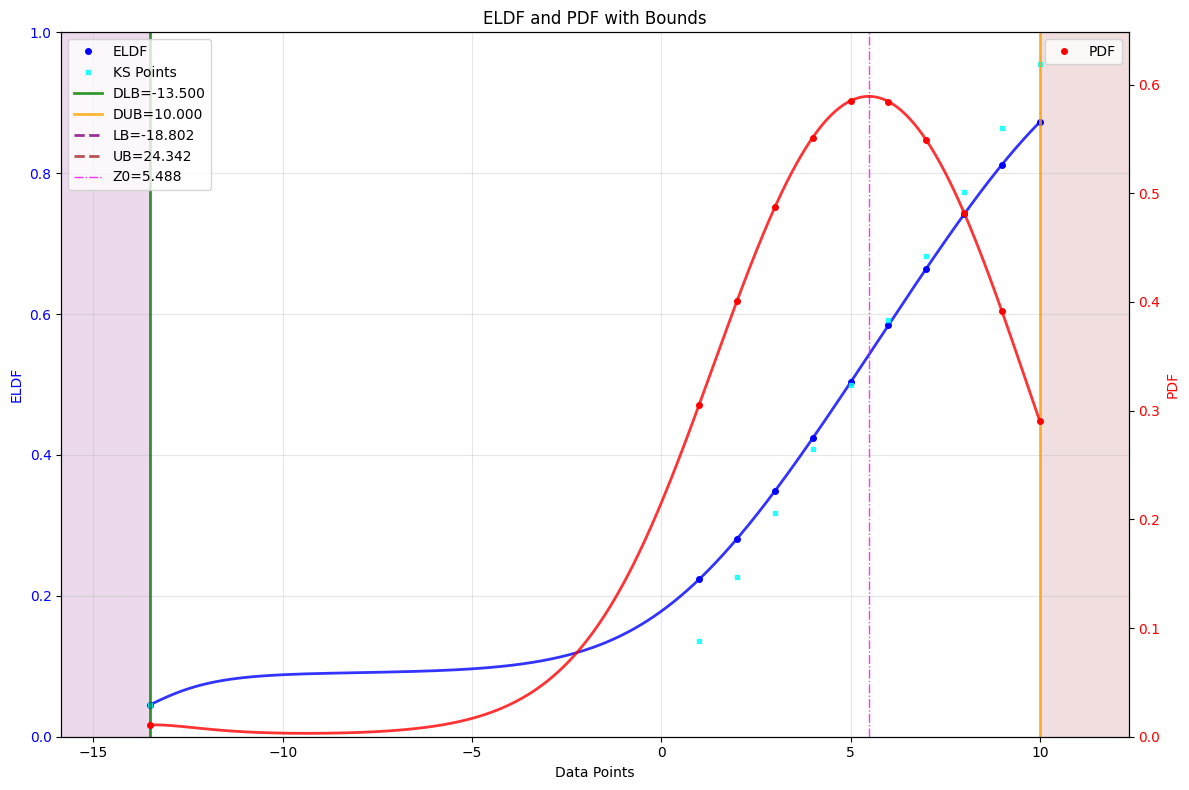

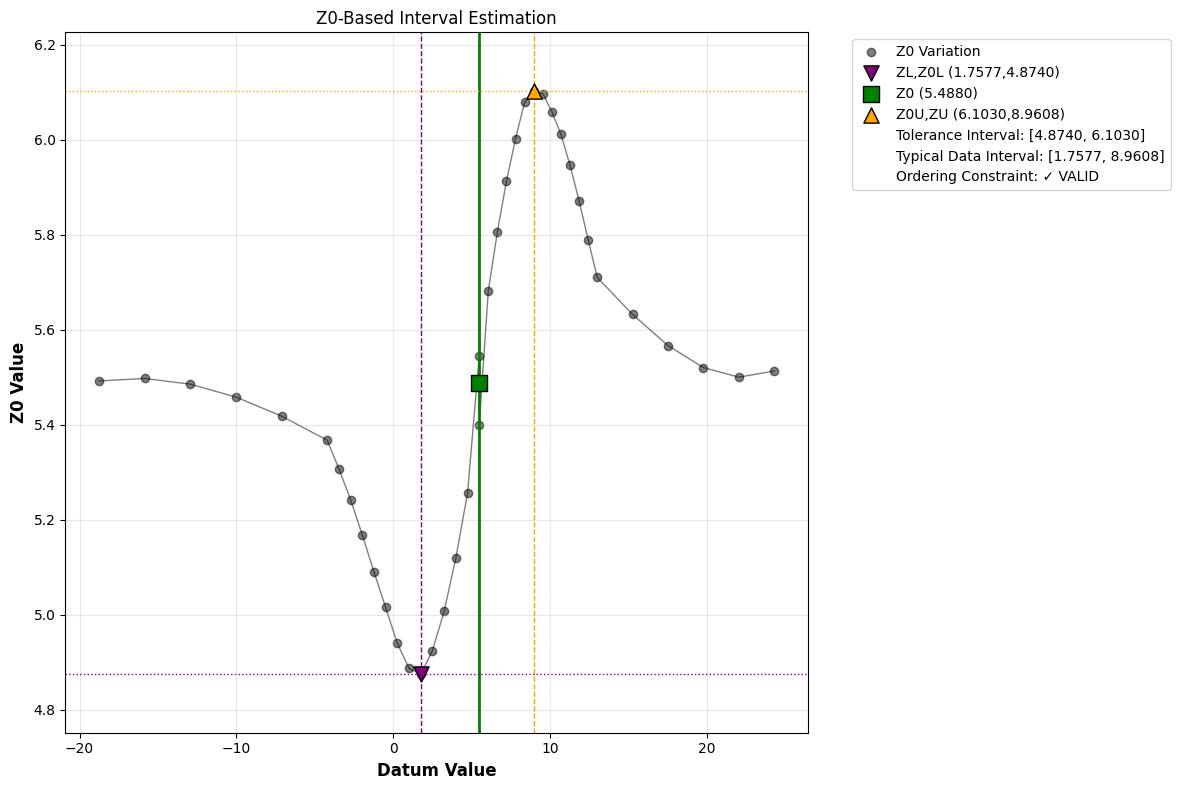

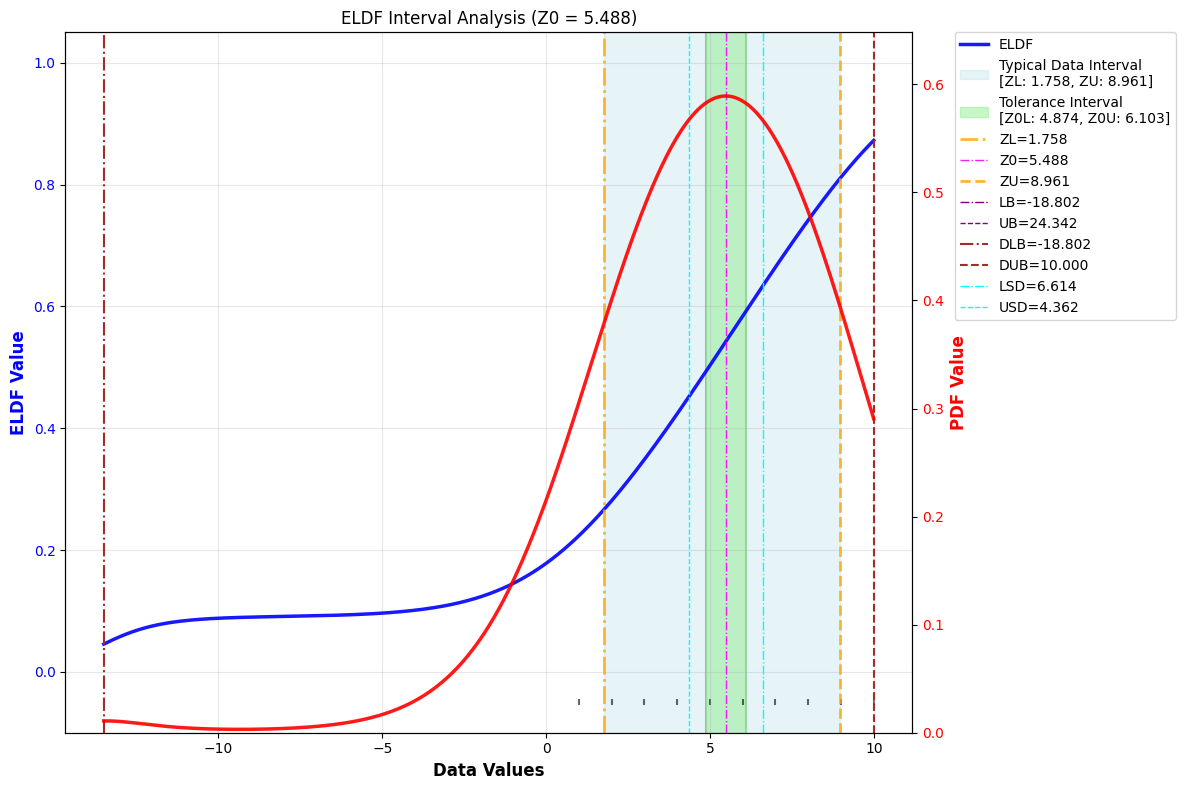

LB: -18.801822182062907
LSB: -14.095725263965676
DLB: -13.5
LCB: -6.1915
LSD: 6.613573765108775
ZL: 1.7577418379202516
Z0L: 4.87404195804198
Z0: 5.4879999999999995
Z0U: 6.103021406024378
ZU: 8.960829950880258
USD: 4.362426234891224
UCB: 10.0
DUB: 10.0
USB: 10.595725263965676
UB: 24.342306362479277


In [3]:
from machinegnostics.magcal import IntervalAnalysis

# create an instance of IntervalAnalysis
ia = IntervalAnalysis(verbose=False, n_points=20)

# fit the data
ia.fit(data)

# plot interval analysis insights
ia.plot()

# results aka gnostics data certification
data_certification = ia.results()
# print
for key, value in data_certification.items():
    print(f"{key}: {value}")

## Advanced Users

In [4]:
# Step 1: get GDF

# import
from machinegnostics.magcal import QLDF, ELDF # Local DF are good choice for cluster analysis

# create a QLDF object
qldf = QLDF()

# fit the data
qldf.fit(data=data)

# create an ELDF object
eldf = ELDF()

# fit the data
eldf.fit(data=data)


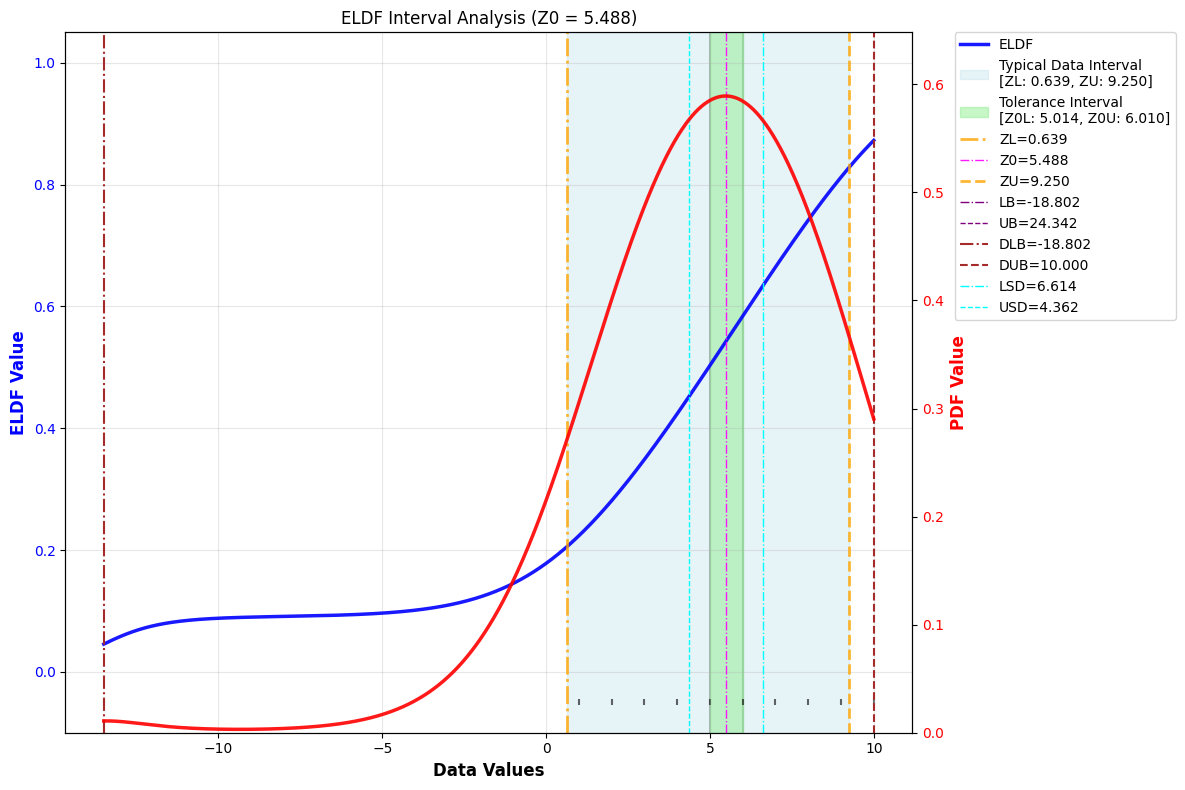

{'LB': -18.801822182062907,
 'LSB': None,
 'DLB': -13.5,
 'LCB': None,
 'LSD': 6.613573765108775,
 'ZL': 0.6386643892963271,
 'Z0L': 5.01360500782866,
 'Z0': 5.4879999999999995,
 'Z0U': 6.010053945442238,
 'ZU': 9.250232446786946,
 'USD': 4.362426234891224,
 'UCB': None,
 'DUB': 10.0,
 'USB': None,
 'UB': 24.342306362479277}

In [5]:
# Step 2: Manual interval analysis

from machinegnostics.magcal import DataIntervals

# create a DataIntervals object
data_intervals = DataIntervals(gdf=eldf)

# fit the data
data_intervals.fit()

# plot
data_intervals.plot()

# print intervals
data_intervals.results()



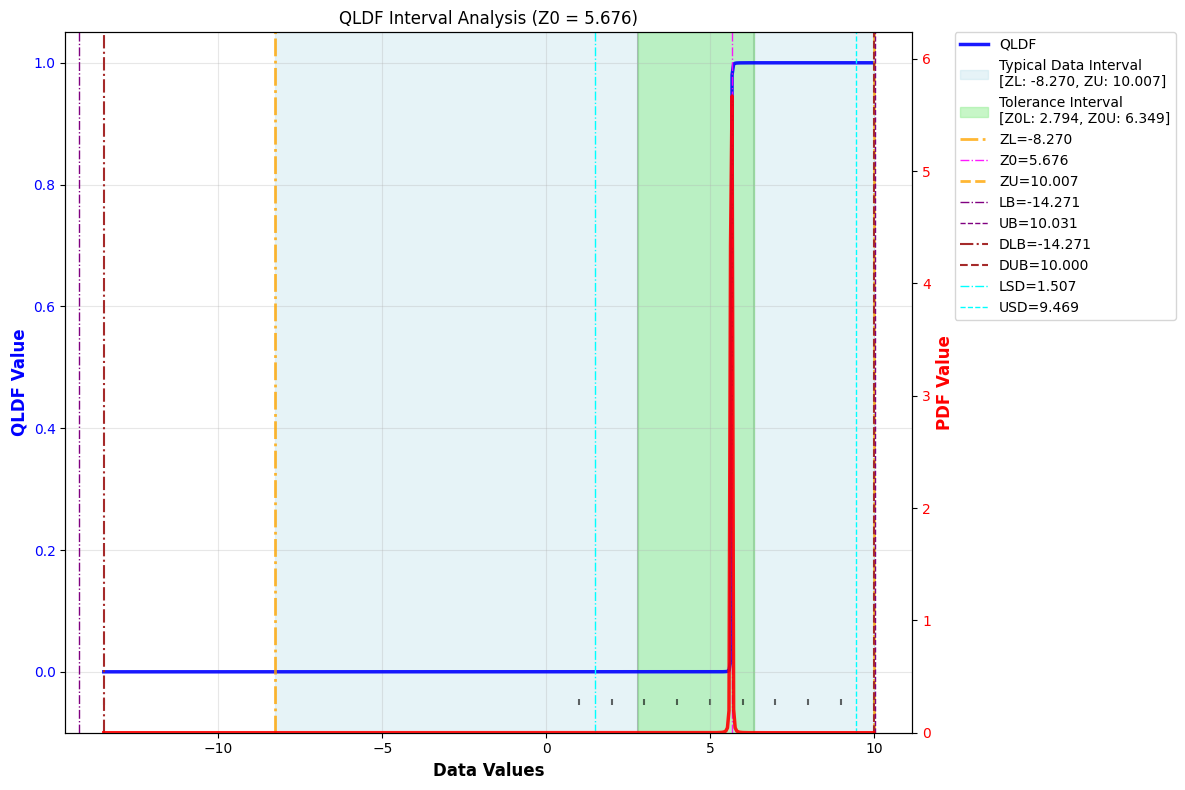

{'LB': -14.270758792268225,
 'LSB': None,
 'DLB': -13.5,
 'LCB': None,
 'LSD': 1.5069579859673645,
 'ZL': -8.269719884647397,
 'Z0L': 2.794040519915055,
 'Z0': 5.675999999999998,
 'Z0U': 6.3490643987458055,
 'ZU': 10.00675359404889,
 'USD': 9.469042014032635,
 'UCB': None,
 'DUB': 10.0,
 'USB': None,
 'UB': 10.031055408249408}

In [6]:
# OR

# if analyst is interested in inliers

# create a DataIntervals object
data_intervals_inliers = DataIntervals(gdf=qldf, verbose=False)

# fit the data
data_intervals_inliers.fit()

# plot
data_intervals_inliers.plot()

# print intervals
data_intervals_inliers.results()